In [65]:
using BandedMatrices
using Plots

In [49]:
function ftest(x)
    f = similar(x)
    w = 2.0*pi
    @. f = sin(w*x)
    df = similar(x)
    @. df = w*cos(w*x)
    return f, df
end

ftest (generic function with 1 method)

In [69]:
function dP6(n, h)
    
    #A = BandedMatrix{Float64}(undef, (n,n), (2,2))
    A = BandedMatrix(Ones(n,n), (2,2))
    alpha = 17.0/57.0
    beta = -1.0/114.0
    A[band(1)] .= alpha
    A[band(2)] .= beta
    A[band(-1)] .= alpha
    A[band(-2)] .= beta
    A[1,2] = 8.0
    A[1,3] = 6.0
    A[n,n-2] = 6.0
    A[n,n-1] = 8.0

    
    B = BandedMatrix(Zeros(n,n), (5,5))
    hm1 = 1.0/h
    a = 30.0/19.0
    t1 = a*(0.5*hm1)
    B[band(-1)]  .= -t1
    B[band(1)] .= t1
    
    a = -43.0/12.0*hm1
    b = -20.0/3.0*hm1
    c = 9.0*hm1
    d = 4.0/3.0*hm1
    e = -1.0/12.0*hm1
    
    B[1,1] = a
    B[1,2] = b
    B[1,3] = c
    B[1,4] = d
    B[1,5] = e

    B[n,n-4] = -e
    B[n,n-3] = -d
    B[n,n-2] = -c
    B[n,n-1] = -b
    B[n,n] = -a
    
    return A, B
end

dP6 (generic function with 1 method)

In [70]:
n1 = 41
x1 = LinRange(0.0, 1.0, n1)
f1, df1e = ftest(x1)
h1 = x1[2] - x1[1]

0.025

In [71]:
Ap6, Bp6 = dP6(n1, h1)

([1.0 8.0 … 0.0 0.0; 0.2982456140350877 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.2982456140350877; 0.0 0.0 … 8.0 1.0], [-143.33333333333334 -266.6666666666667 … 0.0 0.0; -31.578947368421055 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 31.578947368421055; 0.0 0.0 … 266.6666666666667 143.33333333333334])

In [72]:
Cp6 = Bp6 * f1
df1p6 = Ap6 \ Cp6

41-element Vector{Float64}:
  5.900657372886343
  6.2734299944257295
  5.949284296849153
  5.607856385729485
  5.079764475656978
  4.4441277408511635
  3.6927130225858416
  2.852669514651515
  1.9415519796667964
  0.9829280932692408
 -7.735637391196185e-6
 -0.9829039224053994
 -1.9416120329583835
  ⋮
 -0.9829039224053981
 -7.735637392364442e-6
  0.9829280932692432
  1.9415519796667897
  2.8526695146515135
  3.6927130225858433
  4.444127740851158
  5.07976447565698
  5.607856385729484
  5.949284296849157
  6.273429994425719
  5.9006573728863785

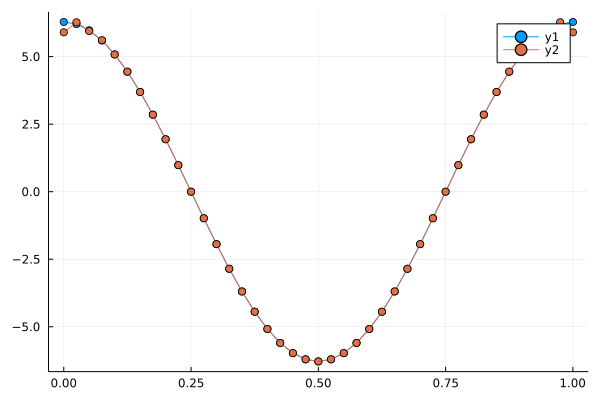

In [73]:
plot(x1,[df1e,df1p6],markershape=:circle)

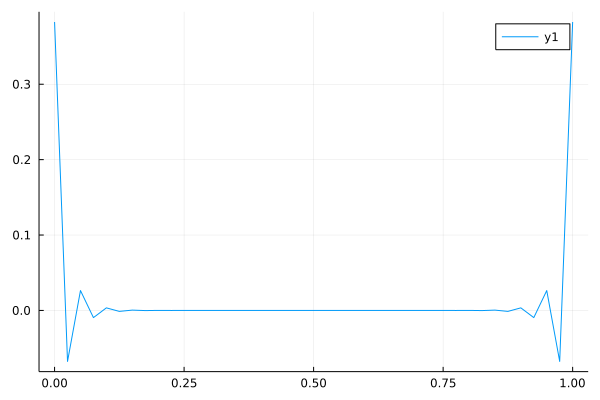

In [74]:
plot(x1,df1e-df1p6)

In [75]:
Ap6

41×41 BandedMatrix{Float64} with bandwidths (2, 2):
  1.0          8.0          6.0         …    ⋅            ⋅ 
  0.298246     1.0          0.298246         ⋅            ⋅ 
 -0.00877193   0.298246     1.0              ⋅            ⋅ 
   ⋅          -0.00877193   0.298246         ⋅            ⋅ 
   ⋅            ⋅          -0.00877193       ⋅            ⋅ 
   ⋅            ⋅            ⋅          …    ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅          …    ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅               ⋅            ⋅ 
  ⋮                                     ⋱                ⋮
   ⋅            ⋅            ⋅               ⋅            ⋅ 
   ⋅            ⋅            ⋅     